# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
!pip install yellowbrick

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [4]:
from sklearn.cluster import KMeans
from sklearn import metrics
model = KMeans(n_clusters=8)
labels = model.fit_predict(X)
metrics.silhouette_score(X, labels, metric='euclidean')

0.5398971441034137

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [5]:
model = KMeans(n_clusters=5)
labels = model.fit_predict(X)
metrics.silhouette_score(X, labels, metric='euclidean')

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [6]:
model = KMeans(n_clusters=3)
labels = model.fit_predict(X)
metrics.silhouette_score(X, labels, metric='euclidean')

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

/Users/manuelescamezsanchez/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/manuelescamezsanchez/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/manuelescamezsanchez/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, Yellowbr

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a218b8450>,
                 k=None, locate_elbow=True, metric='silhouette', model=None,
                 timings=False)


/Users/manuelescamezsanchez/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a218b8450>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=False)
KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1a218b8450>,
                 k=None, locate_elbow=True, metric='calinski_harabasz',
                 model=None, timings=False)


/Users/manuelescamezsanchez/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


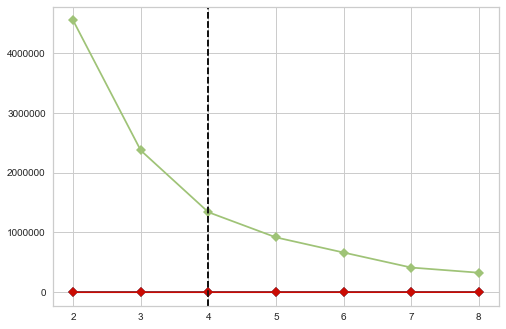

In [7]:
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer1 = KElbowVisualizer(model, k=(2,9), metric="silhouette", timings=False)
visualizer2 = KElbowVisualizer(model, k=(2,9), metric="distortion", timings=False)
visualizer3 = KElbowVisualizer(model, k=(2,9), metric="calinski_harabasz", timings=False)

print(visualizer1.fit(X))
print(visualizer2.fit(X))
print(visualizer3.fit(X))

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [14]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(X)
print(AgglomerativeClustering())
metrics.silhouette_score(X, labels)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)


0.6587292996216916

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

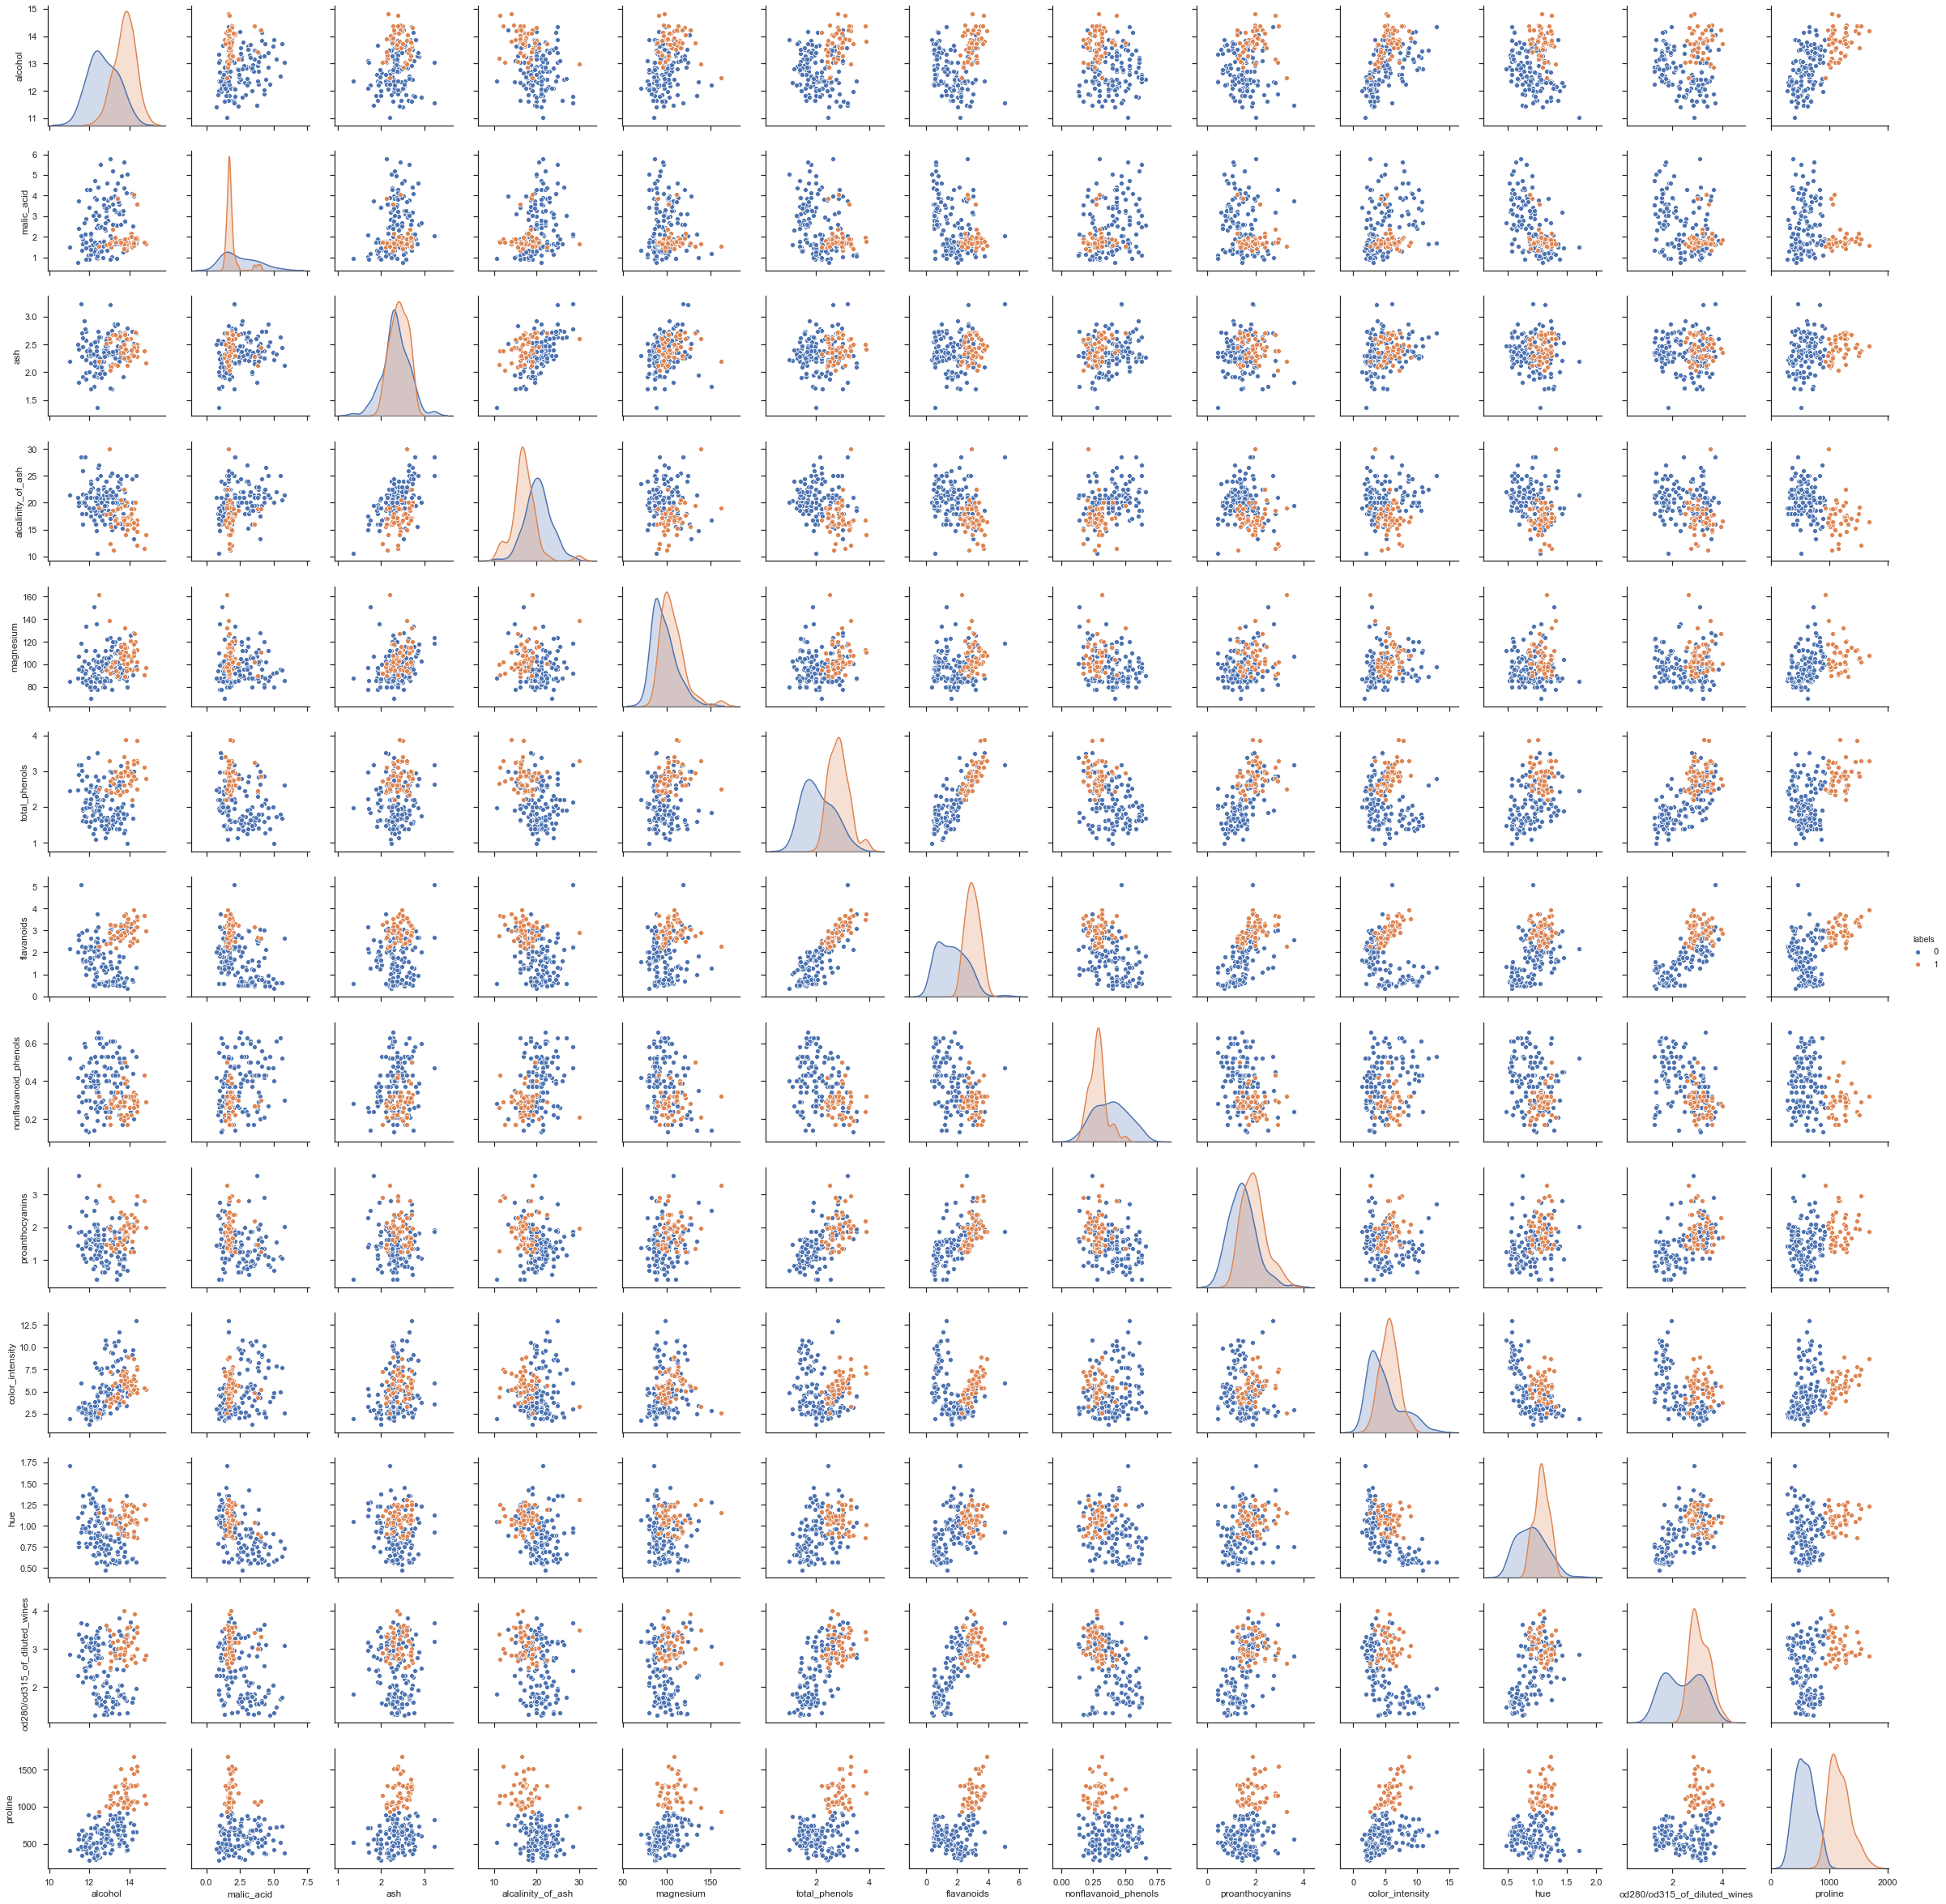

In [16]:
import seaborn as sns
sns.set(style="ticks")
X['labels'] = clustering.labels_
sns.pairplot(X, hue="labels")

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

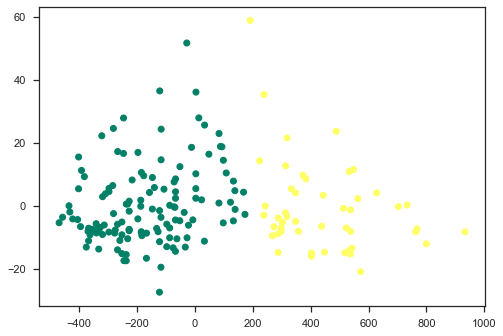

In [30]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)
pca = pca.transform(X)

plt.scatter(pca[:,0], pca[:,1], c=clustering.labels_, cmap='summer')

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [ ]:
#Este lo dejo para verlo más adelante, ya he tenido suficiente por hoy :(